In [3]:
pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.8 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 10.5 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 12.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 3.7 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load dataset
df = pd.read_csv("/Users/yadvendrasingh/Downloads/Cleaned_Indian_Airlines.csv")

In [7]:
# Preview
print("Shape:", df.shape)
print(df.head())

Shape: (300153, 12)
   unnamed:_0 airline_name flight_number source_city departure_time  \
0           0     Spicejet       Sg-8709       Delhi        Evening   
1           1     Spicejet       Sg-8157       Delhi  Early_Morning   
2           2      Airasia        I5-764       Delhi  Early_Morning   
3           3      Vistara        Uk-995       Delhi        Morning   
4           4      Vistara        Uk-963       Delhi        Morning   

  number_of_stops   arrival_time destination_city travel_class  \
0            Zero          Night           Mumbai      Economy   
1            Zero        Morning           Mumbai      Economy   
2            Zero  Early_Morning           Mumbai      Economy   
3            Zero      Afternoon           Mumbai      Economy   
4            Zero        Morning           Mumbai      Economy   

   flight_duration  days_until_departure  ticket_price  
0             2.17                     1          5953  
1             2.33                     1  

# -------- A. PRICE ANALYSIS --------



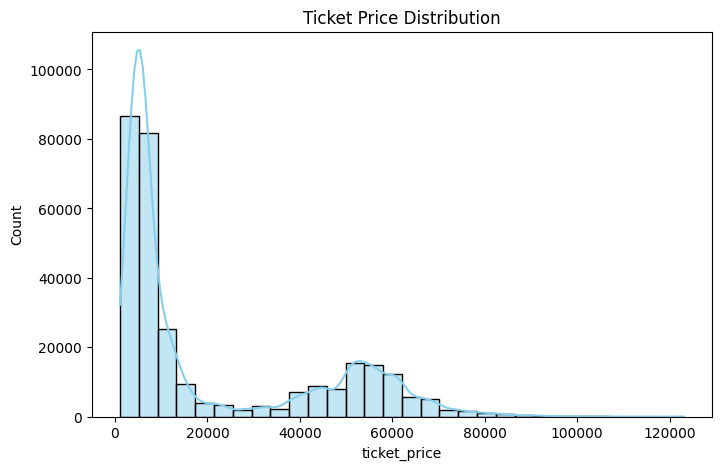

In [8]:
# Price distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['ticket_price'], kde=True, bins=30, color='skyblue')
plt.title("Ticket Price Distribution")
plt.show()

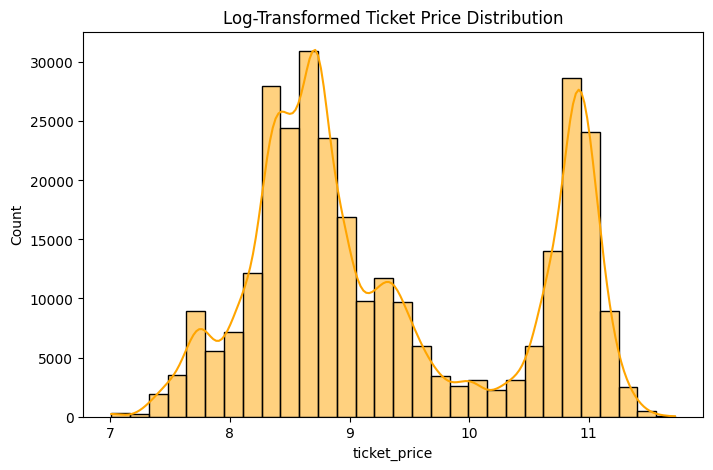

In [9]:
# Log-transformed price distribution
plt.figure(figsize=(8, 5))
sns.histplot(np.log1p(df['ticket_price']), kde=True, bins=30, color='orange')
plt.title("Log-Transformed Ticket Price Distribution")
plt.show()

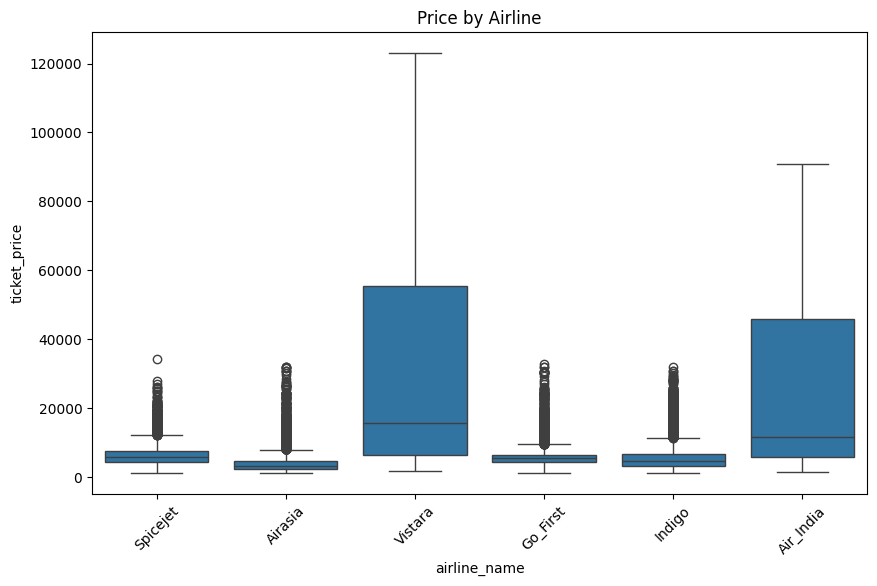

In [10]:
# Price by Airline
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='airline_name', y='ticket_price')
plt.xticks(rotation=45)
plt.title("Price by Airline")
plt.show()


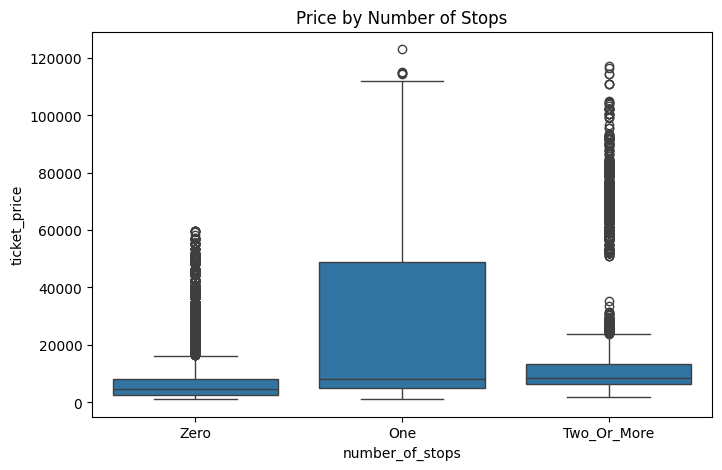

In [11]:
# Price by Stops
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='number_of_stops', y='ticket_price')
plt.title("Price by Number of Stops")
plt.show()


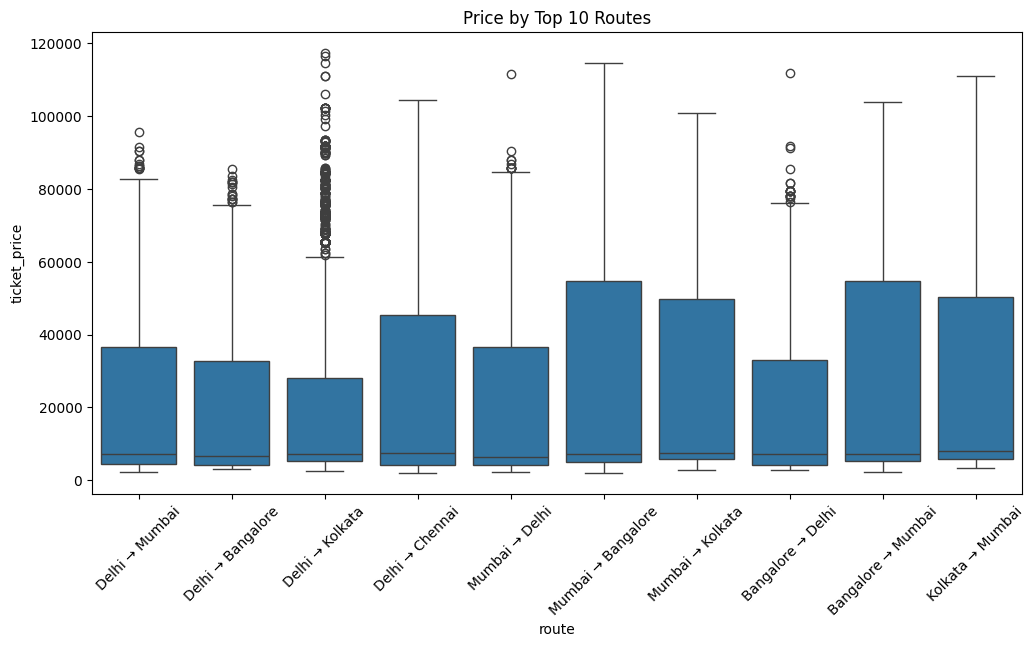

In [12]:
# Price by Route (top 10 routes)
df['route'] = df['source_city'] + " → " + df['destination_city']
top_routes = df['route'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['route'].isin(top_routes)], x='route', y='ticket_price')
plt.xticks(rotation=45)
plt.title("Price by Top 10 Routes")
plt.show()

# -------- B. OUTLIER DETECTION --------

In [14]:
# -------- B. OUTLIER DETECTION --------

# IQR Method
Q1 = df['ticket_price'].quantile(0.25)
Q3 = df['ticket_price'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[(df['ticket_price'] < (Q1 - 1.5 * IQR)) | (df['ticket_price'] > (Q3 + 1.5 * IQR))]
print("Number of price outliers (IQR):", len(outliers_iqr))


Number of price outliers (IQR): 123


In [15]:
# Z-score Method
z_scores = np.abs((df['ticket_price'] - df['ticket_price'].mean()) / df['ticket_price'].std())
outliers_z = df[z_scores > 3]
print("Number of price outliers (Z-score):", len(outliers_z))

Number of price outliers (Z-score): 602


# -------- C. DURATION VS PRICE --------


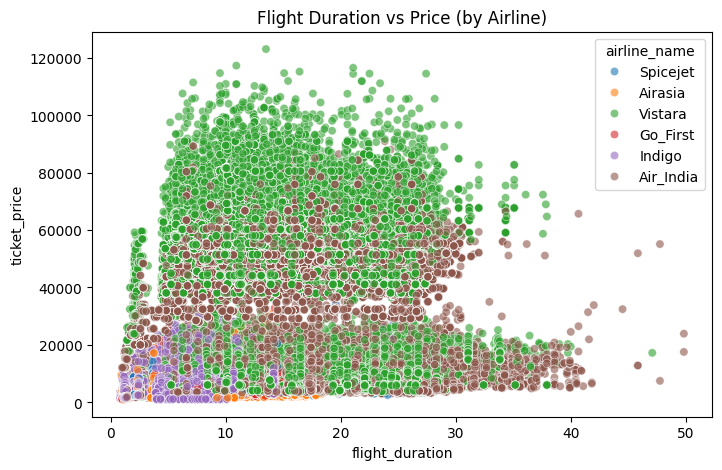

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='flight_duration', y='ticket_price', hue='airline_name', alpha=0.6)
plt.title("Flight Duration vs Price (by Airline)")
plt.show()


In [17]:
print("Correlation (Price & Duration):", df['ticket_price'].corr(df['flight_duration']))


Correlation (Price & Duration): 0.2042223678454272


# -------- D. DEPARTURE TIME IMPACT --------


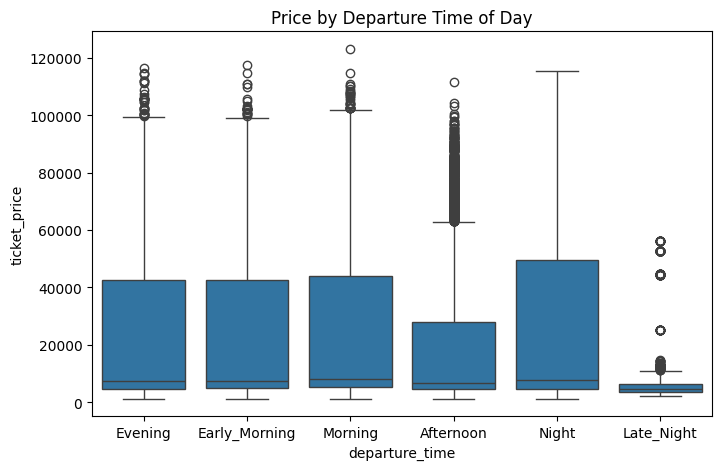

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='departure_time', y='ticket_price')
plt.title("Price by Departure Time of Day")
plt.show()

# -------- E. CATEGORICAL ANALYSIS --------

In [ ]:
# Airline frequency
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='airline_name', order=df['airline_name'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Flight Counts per Airline")
plt.show()

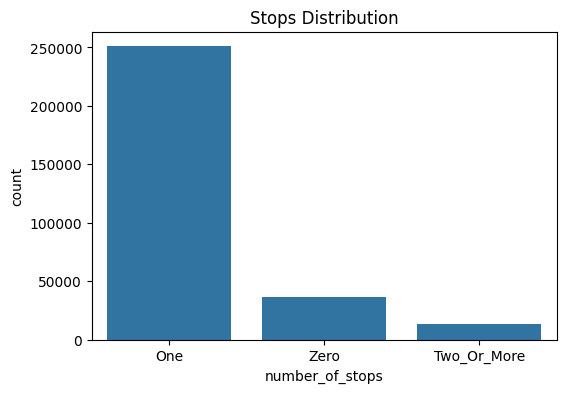

In [19]:
# Stops distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='number_of_stops', order=df['number_of_stops'].value_counts().index)
plt.title("Stops Distribution")
plt.show()



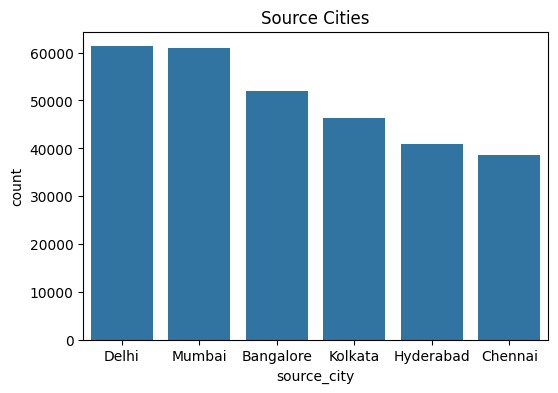

In [20]:
# Popular source cities
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='source_city', order=df['source_city'].value_counts().index)
plt.title("Source Cities")
plt.show()

# -------- F. ADVANCED VISUALS --------

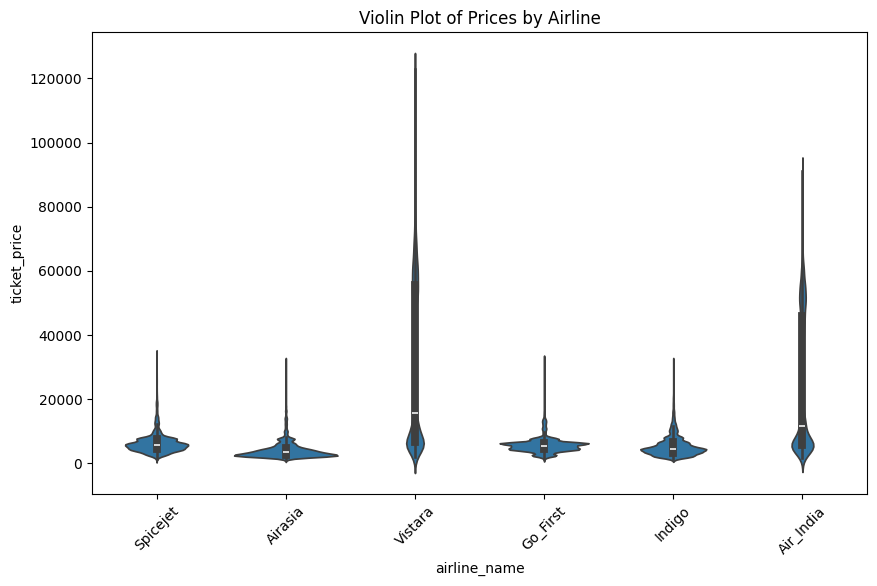

In [21]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='airline_name', y='ticket_price')
plt.xticks(rotation=45)
plt.title("Violin Plot of Prices by Airline")
plt.show()

# -------- G. ADDITIONAL INSIGHTS --------

In [22]:
top_routes_counts = df['route'].value_counts().head(10)
print("Top 10 Most Frequent Routes:\n", top_routes_counts)

# Airline performance (avg price & duration)
airline_summary = df.groupby('airline_name')[['ticket_price', 'flight_duration']].mean().sort_values(by='ticket_price', ascending=False)
print("\nAverage Price & Duration by Airline:\n", airline_summary)

Top 10 Most Frequent Routes:
 route
Delhi → Mumbai        15289
Mumbai → Delhi        14809
Delhi → Bangalore     14012
Bangalore → Delhi     13756
Bangalore → Mumbai    12939
Mumbai → Bangalore    12885
Mumbai → Kolkata      12602
Delhi → Kolkata       11934
Kolkata → Mumbai      11467
Delhi → Chennai       10780
Name: count, dtype: int64

Average Price & Duration by Airline:
               ticket_price  flight_duration
airline_name                               
Vistara       30396.536302        13.326634
Air_India     23507.019112        15.504235
Spicejet       6179.278881        12.579767
Go_First       5652.007595         8.755380
Indigo         5324.216303         5.795197
Airasia        4091.072742         8.941714


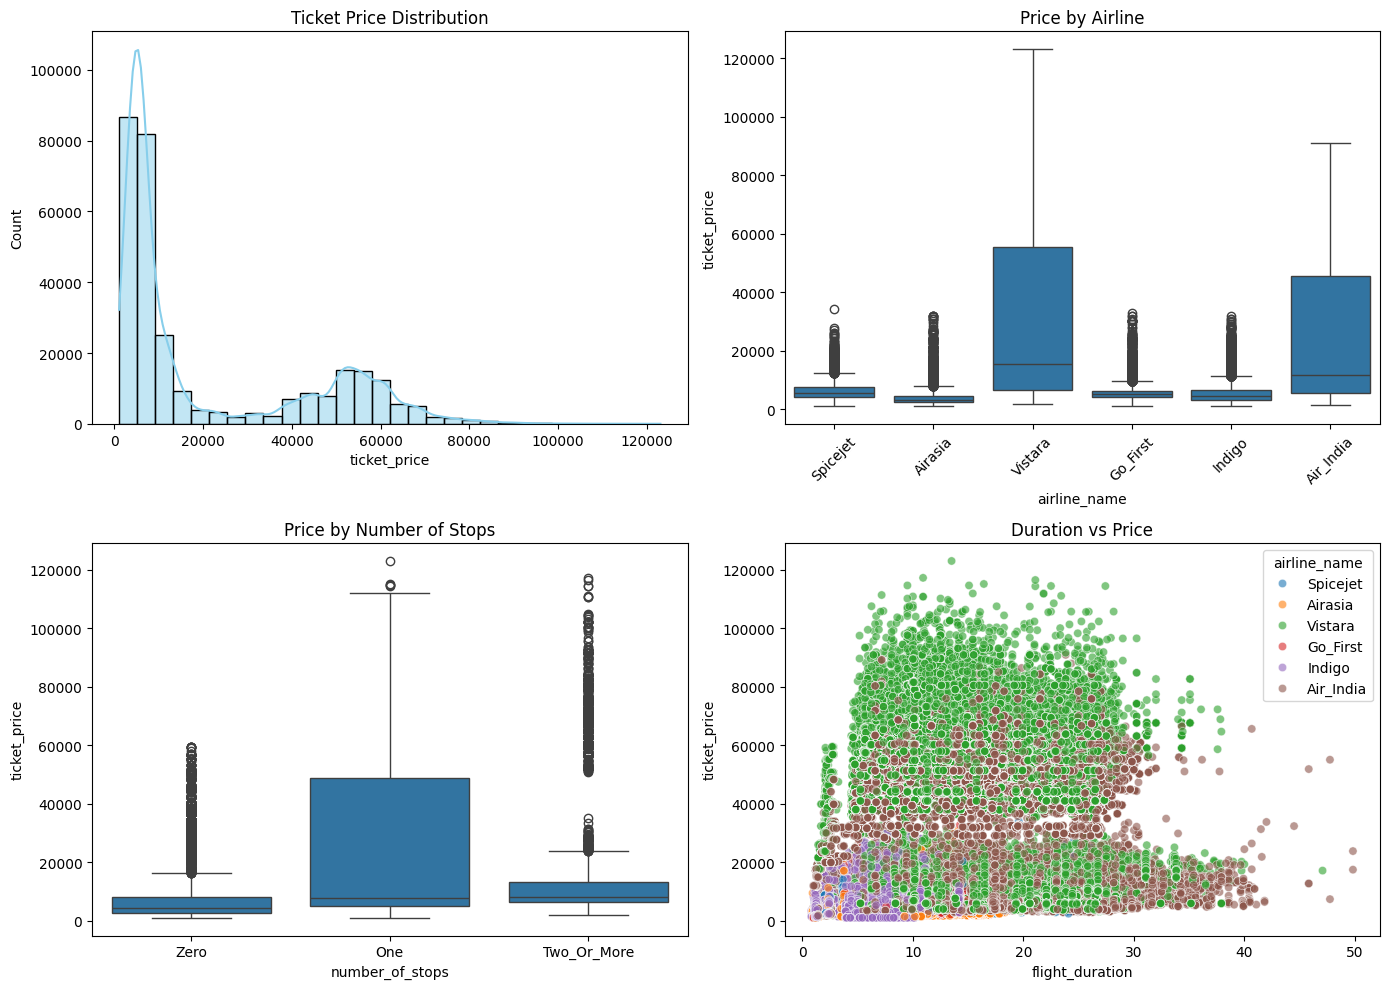

In [23]:
df['route'] = df['source_city'] + " → " + df['destination_city']

# Create figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# --- 1. Price Distribution ---
sns.histplot(df['ticket_price'], kde=True, bins=30, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title("Ticket Price Distribution")

# --- 2. Price by Airline ---
sns.boxplot(data=df, x='airline_name', y='ticket_price', ax=axes[0, 1])
axes[0, 1].set_title("Price by Airline")
axes[0, 1].tick_params(axis='x', rotation=45)

# --- 3. Price by Number of Stops ---
sns.boxplot(data=df, x='number_of_stops', y='ticket_price', ax=axes[1, 0])
axes[1, 0].set_title("Price by Number of Stops")

# --- 4. Duration vs Price ---
sns.scatterplot(data=df, x='flight_duration', y='ticket_price', hue='airline_name', alpha=0.6, ax=axes[1, 1])
axes[1, 1].set_title("Duration vs Price")

plt.tight_layout()
plt.show()